In [1]:
import sys,os 
os.chdir('.\..\..')

In [2]:
import deep_nn.deep_nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras import optimizers

Using TensorFlow backend.


In [3]:
train100 = pd.read_csv("./data_analysis/projekt1/regression/data.activation.train.100.csv")
test100 = pd.read_csv("./data_analysis/projekt1/regression/data.activation.test.100.csv")
len(train100)

100

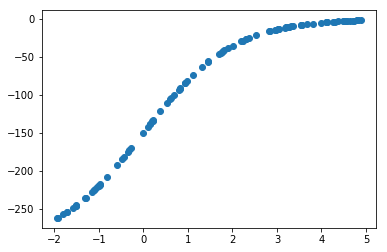

In [4]:
plt.scatter(train100.x, train100.y)

In [5]:
X = train100.x.values.reshape(1, -1)
print(X.shape)
Y = train100.y.values.reshape(1, -1)
print(Y.shape)

(1, 100)
(1, 100)


In [6]:
X_scaler = MinMaxScaler()
Y_scaler = MinMaxScaler()
X_scaled = X_scaler.fit_transform(train100.x.values.reshape(-1, 1)).reshape(1, -1)
Y_scaled = Y_scaler.fit_transform(train100.y.values.reshape(-1, 1)).reshape(1, -1)
print(Y_scaler.data_range_)
print(X_scaler.data_range_)
print(X_scaled.shape)
print(Y_scaled.shape)

[259.98204862]
[6.82196584]
(1, 100)
(1, 100)


In [7]:
from IPython.core.debugger import set_trace

In [8]:
parameters2, costs = nn.model(X_scaled, 
                      Y_scaled, 
                      [1, 12, 12, 12, 12, 1], 
                      ["relu", "relu", "relu", "relu", "relu", "linear"], 
                      cost_func="MSE", 
                      learning_rate=0.1,
                      beta=0.9, 
                      mini_batch_size=64)

Cost after epoch 0: 7.176700
Cost after epoch 1000: 0.001392
Cost after epoch 2000: 0.000446
Cost after epoch 3000: 0.000264
Cost after epoch 4000: 0.000192
Cost after epoch 5000: 0.000142
Cost after epoch 6000: 0.000130
Cost after epoch 7000: 0.000127
Cost after epoch 8000: 0.000125
Cost after epoch 9000: 0.000086


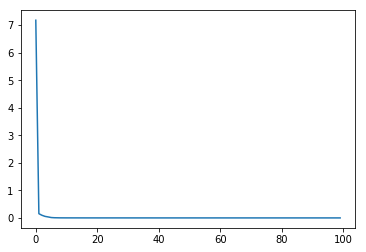

In [9]:
plt.plot(costs)

In [10]:
y_pred2 = nn.predict(parameters2, X_scaled, ["relu", "relu", "relu", "relu", "relu", "linear"])

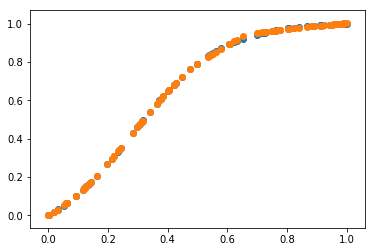

In [11]:
plt.autoscale(enable=True, axis='both', tight=None)
plt.scatter(X_scaled, Y_scaled)
plt.scatter(X_scaled, y_pred2)
plt.show()

In [12]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    #[1, 12, 12, 12, 12, 1]
    model.add(Dense(1, input_dim=1, kernel_initializer='normal', activation='relu'))
    model.add(Dense(12, kernel_initializer='normal', activation='relu'))
    model.add(Dense(12, kernel_initializer='normal', activation='relu'))
    model.add(Dense(12, kernel_initializer='normal', activation='relu'))
    model.add(Dense(12, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='linear'))
    # Compile model
    sgd = optimizers.SGD(lr=0.1, momentum=0.9)
    model.compile(loss='mean_squared_error', optimizer=sgd)
    return model

In [13]:
estimator = KerasRegressor(build_fn=baseline_model, epochs=10000, batch_size=64)


In [14]:
X_s = X_scaled.reshape(-1, 1)
X_s.shape

Y_s = Y_scaled.reshape(-1, 1)
Y_s.shape

(100, 1)

In [15]:
history = estimator.fit(X_s, Y_s, verbose=0)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


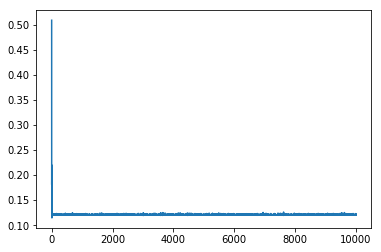

In [16]:
plt.plot(history.history['loss'])

In [17]:
y_pred_keras = estimator.predict(X_s)

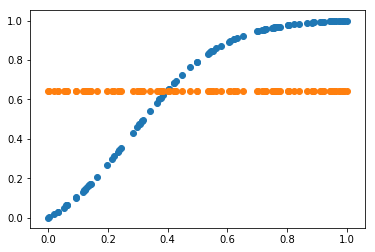

In [18]:
plt.autoscale(enable=True, axis='both', tight=None)
plt.scatter(X_s, Y_s)
plt.scatter(X_s, y_pred_keras)
plt.show()